In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'D:\paq\yuebing.python_work\python_work\test_work\Amazon销量数据集\amazon.csv')

print("=== 数据概览 ===")
print(f"样本数量：{len(data)}")
print("前5行数据：")
print(data.head())
print("\n特征列表：")
print(data.columns.tolist())

=== 数据概览 ===
样本数量：1465
前5行数据：
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1     

In [ ]:
import matplotlib.ticker as ticker

# 预处理价格数据（去除₹和逗号，转换为浮点数）
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# 计算价格范围
discounted_range = data['discounted_price'].max() - data['discounted_price'].min()
actual_range = data['actual_price'].max() - data['actual_price'].min()

# 智能刻度间隔函数
def calculate_tick_step(range_val):
    """根据数据范围计算合适的刻度间隔"""
    scale = range_val / 8  # 目标8个主刻度
    magnitude = 10 ** np.floor(np.log10(scale))
    step = magnitude * (scale // magnitude)
    return max(step, 50)  # 最小间隔50卢比



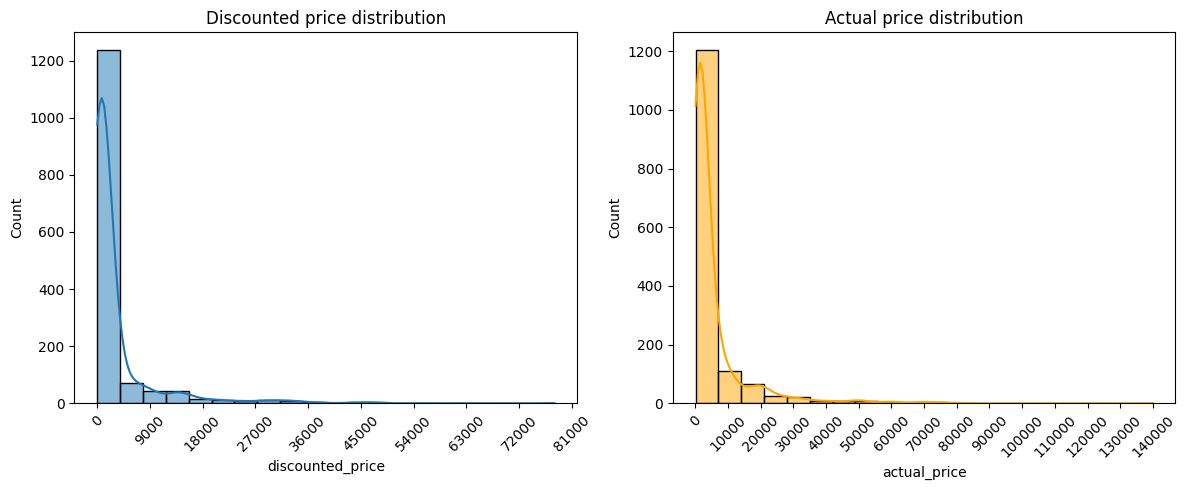

In [10]:
# 设置图形
plt.figure(figsize=(12,5))

# 折扣价格分布
plt.subplot(1,2,1)
sns.histplot(data['discounted_price'], bins=20, kde=True)
plt.title('Discounted price distribution')
plt.xticks(rotation=45)

# 设置刻度密度
tick_step = calculate_tick_step(discounted_range)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_step))

# 实际价格分布
plt.subplot(1,2,2)
sns.histplot(data['actual_price'], bins=20, kde=True, color='orange')
plt.title('Actual price distribution')
plt.xticks(rotation=45)

# 设置刻度密度
tick_step = calculate_tick_step(actual_range)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_step))

plt.tight_layout()
plt.show()

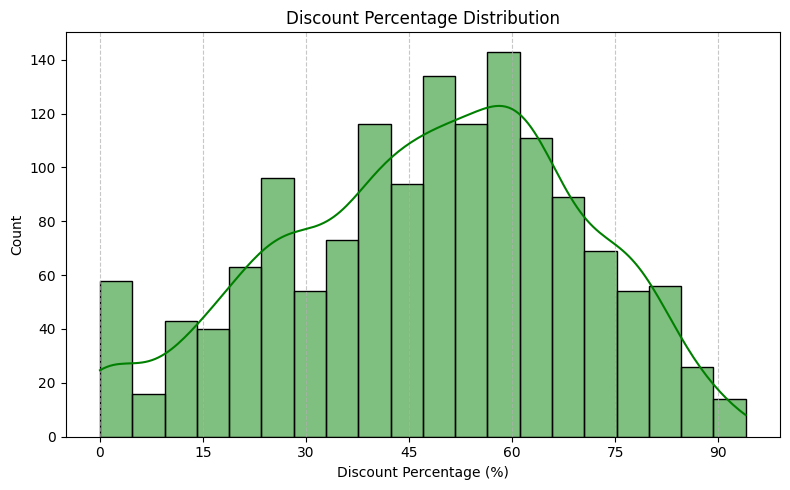

In [ ]:
# 创建图表
plt.figure(figsize=(8,5))

# 绘制柱状图
sns.histplot(data['discount_percentage'], bins=20, kde=True, color='green')
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount Percentage (%)')

# 设置刻度间隔
ticker_spacing = 15  # 每15%一个刻度
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))

# 添加网格线
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 设置x轴范围
min_discount = data['discount_percentage'].min()
max_discount = data['discount_percentage'].max()
plt.xlim(min_discount - 5, max_discount + 5)  # 留出一些空间

plt.tight_layout()
plt.show()

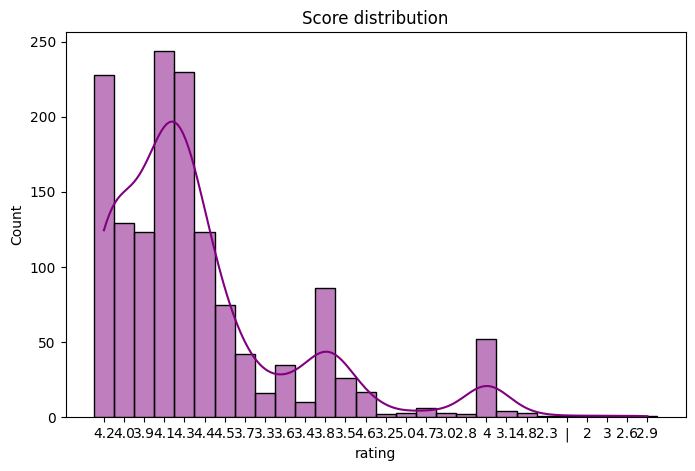

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(data['rating'], bins=15, kde=True, color='purple')
plt.title('Score distribution')
plt.show()


C:\Users\paq13\AppData\Local\Temp\ipykernel_7460\1771234626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


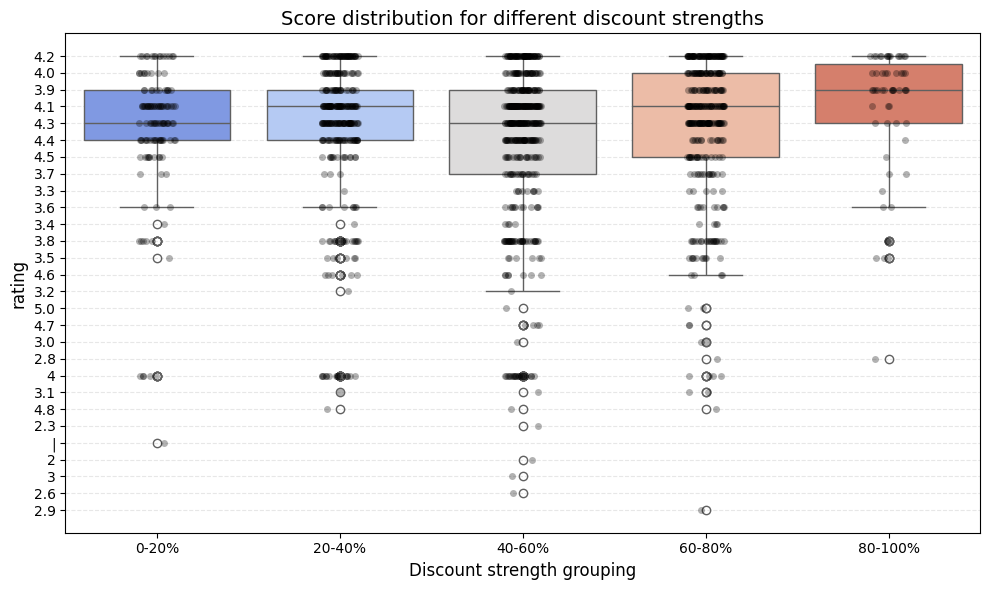

In [32]:
# 创建折扣力度的分组
data['discount_group'] = pd.cut(
    data['discount_percentage'],
    bins=[0, 20, 40, 60, 80, 100],
    labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
)

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, 
    x='discount_group', 
    y='rating',
    palette='coolwarm'
)

plt.title('Score distribution for different discount strengths', fontsize=14)
plt.xlabel('Discount strength grouping', fontsize=12)
plt.ylabel('rating', fontsize=12)

# 添加数据点（带抖动）
sns.stripplot(
    data=data, 
    x='discount_group', 
    y='rating',
    color='black', 
    alpha=0.3, 
    jitter=True
)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
